



**Занятие 3
. Регрессия. Основые термины в машинном обучении.**

---

**Среднее значение, медиана и мода**


Что мы можем узнать, глядя на группу чисел?

В машинном обучении (и в математике) нас часто интересуют три значения:

* Среднее - среднее значение
* Медиана - среднее значение точки
* Мода — наиболее распространенное значение.


Чтобы вычислить среднее значение, найдите сумму всех значений и разделите сумму на количество значений:

In [ ]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [ ]:
len(speed)

In [ ]:
(99+86+87+88+111+86+103+87+94+78+77+85+86)/13

In [ ]:
import numpy

In [ ]:
numpy.mean(speed)

Медиана это значение, посередине выборки после того, как вы отсортировали все значения по возрастанию

In [ ]:
speed.sort()

In [ ]:
speed

In [ ]:
numpy.median(speed)

Мода — это значение, которое появляется в выборке наибольшее количество раз:

In [ ]:
import statistics

x = statistics.mode(speed)

print(x)

**Cтандартное отклонение**


Стандартное отклонение — это число, которое описывает, насколько разбросаны значения.

Низкое стандартное отклонение означает, что большинство чисел близки к среднему (mean) значению.

Высокое стандартное отклонение означает, что значения разбросаны по более широкому диапазону.

In [ ]:
speed_1 = [86,87,88,86,87,85,86]

In [ ]:
numpy.std(speed_1)

In [ ]:
speed_2 = [32,111,138,28,59,77,97]

In [ ]:
numpy.std(speed_2)

**Перцентили**

Перцентиль это значение, которое заданная случайная величина не превышает с фиксированной вероятностью, заданной в процентах.

Пример: допустим, у нас есть массив возрастов всех людей, живущих на улице.

In [ ]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

In [ ]:
x = numpy.percentile(ages, 75)

print(x)

Чему равен 75 процентиль? В данном случае он равен 43, что означает, что 75%  людей живущих на улице моложе 43 лет.


In [ ]:
numpy.percentile(ages, 90)

**Регрессия**

---




Термин регрессия используется, когда вы пытаетесь найти взаимосвязь между переменными.

В машинном обучении и статистическом моделировании эта связь используется для прогнозирования исхода будущих событий.

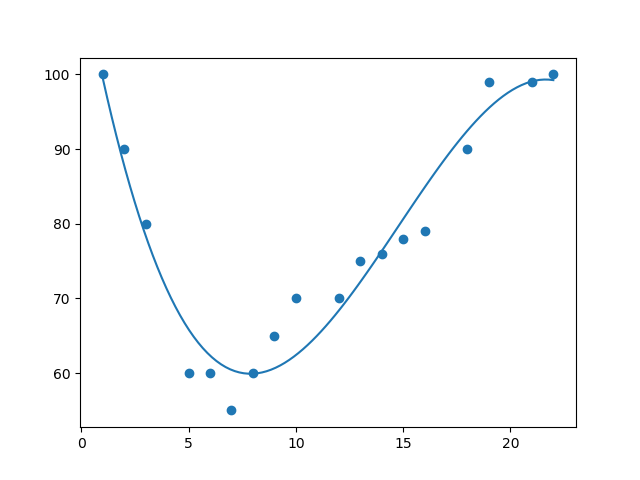

In [ ]:
from google.colab import drive # Интеграция с гугл-диском
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

Датасет 1:  https://drive.google.com/file/d/1D3OXD4lij_2nO1BYtkF-7b045K9gGVfc/view?usp=share_link

In [ ]:
df_housing = pd.read_csv('/content/gdrive/MyDrive/Dataset/house_prices.csv')

In [ ]:
df_housing.head()

In [ ]:
df_housing.info()

In [ ]:
df_housing.tail(30)

In [ ]:
df_housing['price_th'] = df_housing['price'].apply(lambda x: round((x / 1000), 2))

In [ ]:
df_housing.tail(30)

In [ ]:
len(df_housing[df_housing['price_th'] == 0.0])

In [ ]:
df_housing.waterfront.value_counts()

In [ ]:
df_housing.view.value_counts()

In [ ]:
df_housing.condition.value_counts()

In [ ]:
df_housing.columns

In [ ]:
df_housing.city.value_counts()

In [ ]:
df_housing.drop(columns=['date', 'price', 'street', 'statezip', 'country', 'city'], inplace= True)

In [ ]:
df_housing.drop(df_housing[df_housing['price_th'] == 0.0].index, inplace = True)

In [ ]:
df_housing.info()

In [ ]:
df_housing_clean = df_housing.copy()

In [ ]:
df_housing_clean

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

In [ ]:
draw_corr_matrix(df_housing_clean, 8)

In [ ]:
df_housing_clean.drop(columns=['condition', 'yr_built', 'yr_renovated'], inplace=True)

In [ ]:
df_housing_clean.columns

In [ ]:
x = df_housing_clean[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']]

In [ ]:
x

In [ ]:
y = df_housing_clean['price_th']

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=10)

In [ ]:
len(x_train)

In [ ]:
len(y_train)

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
r2_score(lr.predict(x_test), y_test)

Рандомный лес


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
r2_score(rf.predict(x_test), y_test)

Градиентный спуск

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
gb.fit(x_train, y_train)

In [ ]:
r2_score(gb.predict(x_test), y_test)

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
el = ElasticNet(max_iter=5000)

In [ ]:
el.fit(x_train, y_train)

In [ ]:
el.score(x_test, y_test)

BayesianRidge

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
br = BayesianRidge()

In [ ]:
br.fit(x_train, y_train)

In [ ]:
br.score(x_test, y_test)

**Практика**

Датасет 2: https://drive.google.com/file/d/1l0VUmXhllUhezGnIvPPuiPAv70e8B-pZ/view?usp=share_link

1. Загрузить и очистить датасет, выделить целевую переменную, разделить на обучающие и тестовые выборки
2. Реализовать произвольный алгоритм регрессии
3. Посчитать score

In [ ]:
ca_housing = pd.read_csv('/content/gdrive/MyDrive/Dataset/California_housing - california_housing_train.csv')

In [ ]:
ca_housing

In [ ]:
ca_housing.info()

In [ ]:
ca_housing = ca_housing.dropna()

In [ ]:
ca_housing.ocean_proximity.value_counts()

In [ ]:
ca_housing.replace({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3, 'ISLAND':4}, inplace = True)

In [ ]:
draw_corr_matrix(ca_housing, 8)

In [ ]:
ca_housing.columns

In [ ]:
ca_housing.drop(columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'ocean_proximity'], inplace=True)

In [ ]:
x = ca_housing.drop(columns=['median_house_value'])

In [ ]:
x

In [ ]:
y = ca_housing['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=10)

Модель

In [ ]:
el = ElasticNet(max_iter=5000, alpha=1.0, l1_ratio=1.0)

In [ ]:
el.fit(x_train, y_train)

In [ ]:
el.score(x_test, y_test)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
lr.score(x_test, y_test)

In [ ]:
lr = ElasticNet(max_iter=5000)

alpha = [0.0, 0.5, 1.0]
l1_ratio = [0.0, 0.5, 1.0]

scores = []
best_score = 0.0
for a in alpha:
    for r in l1_ratio:
        lr.set_params(alpha=a, l1_ratio=r)
        lr.fit(x_train, y_train)
        score = lr.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_params = [a, r]

In [ ]:
best_score

In [ ]:
best_params



---



Grid Search

Большинство моделей машинного обучения содержат параметры, которые можно настроить, чтобы изменить способ обучения модели. Например, модель логистической регрессии от sklearn имеет параметр C, который управляет регуляризацией, что влияет на сложность модели.

Как мы выбираем лучшее значение для C? Наилучшее значение зависит от данных, используемых для обучения модели.

Один из методов заключается в том, чтобы попробовать разные значения, а затем выбрать значение, дающее наилучший результат. Этот метод известен как поиск по сетке. Если бы нам нужно было выбрать значения для двух или более параметров, мы бы оценили все комбинации наборов значений, таким образом сформировав сетку значений.

Прежде чем мы перейдем к примеру, полезно знать, что делает параметр, который мы изменяем. Более высокие значения C сообщают модели, что обучающие данные напоминают информацию из реального мира, и придают больший вес обучающим данным. В то время как более низкие значения C делают обратное.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

In [ ]:
X = iris['data']
y = iris['target']

lr = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag' , 'saga']

scores = []
best_score = 0.0
for solver in solvers:
    for choice in C:
        lr.set_params(C=choice, solver = solver)
        lr.fit(X, y)
        score = lr.score(X, y)
        if score > best_score:
            best_score = score
            best_params = [choice, solver]


In [ ]:
best_score

In [ ]:
best_params

In [ ]:
logit = LogisticRegression(max_iter = 10000, solver = 'lbfgs', C = 1.75)
logit.fit(X, y)
logit.score(X, y)

Практика:

Wine quality dataset:

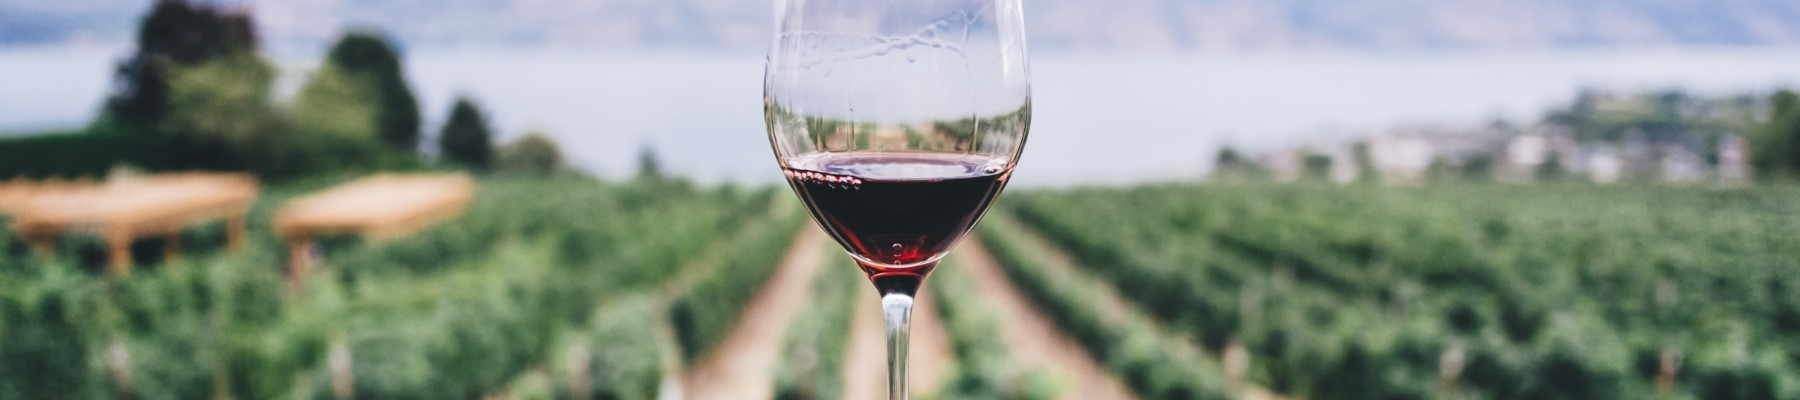


https://drive.google.com/file/d/14i2TtlcD931sb3-T1zOsgzL-2xggNx3G/view?usp=share_link

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


In [ ]:
wine_df = pd.read_csv('winequalityN.csv')

In [ ]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df.quality.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


https://scikit-learn.org/1.5/index.html

1. Загрузить и очистить датасет
2. Решить вопрос с пропущенными значениями.
3. Построить матрицу корреляции


4. Выделить целевую переменную quality, разделить на обучающие и тестовые выборки
5. Реализовать произвольный алгоритм регрессии использовать GridSearch
6. Посчитать r2 score

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_df.dropna(inplace=True)

In [ ]:
wine_df['type'].value_counts()

,count
type,
white,4870
red,1593


In [ ]:
wine_df['type'].replace('white', 0, inplace = True)
wine_df['type'].replace('red', 1, inplace = True)

In [ ]:
wine_df['quality'].replace(3, 0, inplace = True)
wine_df['quality'].replace(4, 1, inplace = True)
wine_df['quality'].replace(5, 2, inplace = True)
wine_df['quality'].replace(6, 3, inplace = True)
wine_df['quality'].replace(7, 4, inplace = True)
wine_df['quality'].replace(8, 5, inplace = True)
wine_df['quality'].replace(9, 6, inplace = True)

In [ ]:
draw_corr_matrix(wine_df, 8)

NameError: name 'draw_corr_matrix' is not defined

In [ ]:
x = wine_df.drop(columns=['quality'])
y = wine_df['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=10)

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

n_jobs = [1, 0, -1]

scores = []
best_score = 0.0

for choice in n_jobs:
    lr.set_params(n_jobs=choice)
    lr.fit(x_train, y_train)
    score = lr.score(x_test, y_test)
    if score > best_score:
        best_score = score
        best_params = [choice]

In [ ]:
best_score

0.30686902462118393

In [ ]:
best_params

[1]

Рандомный лес


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=10)

n_estimators = [10, 100]
criterion = ["squared_error", "poisson"]

scores = []
best_score = 0.0
for estimator in n_estimators:
    for choice in criterion:
        rfr.set_params(n_estimators=estimator, criterion = choice)
        rfr.fit(x_train, y_train)
        score = rfr.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_params = [estimator, choice]

In [ ]:
best_score

0.568998175684061

In [ ]:
best_params

[100, 'poisson']

Градиентный спуск

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

parameters = {'loss':('squared_error', 'absolute_error'), 'learning_rate':[0.1, 0.2]}
reg_cv = GridSearchCV(reg, parameters)

In [ ]:
reg_cv.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.2],
                         'loss': ('squared_error', 'absolute_error')})

In [ ]:
reg_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, random_state=0)

In [ ]:
reg_cv.score(x_test, y_test)

0.4266321576885129

ElasticNet

BayesianRidge

In [ ]:
wine_df.info()

In [ ]:
wine_df.dropna(inplace = True)

In [ ]:
wine_df.info()

In [ ]:
wine_df.type.value_counts()

In [ ]:
wine_df.type.replace('white', 0, inplace = True)

In [ ]:
wine_df.type.replace('red', 1, inplace = True)

In [ ]:
draw_corr_matrix(wine_df, 10)

In [ ]:
wine_df.columns

In [ ]:
wine_df.drop(columns = ['fixed acidity', 'residual sugar', 'pH', 'free sulfur dioxide'], inplace = True)

In [ ]:
x = wine_df.drop(columns = ['quality'])
y = wine_df['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

Линейная регрессия

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
lr.score(x_test, y_test)

Рандомный лес


In [ ]:
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor(random_state=0)
parameters = {'max_depth':[1, 2, 5], 'n_estimators':[10, 100]}
regressor = GridSearchCV(RFR, parameters)

In [ ]:
regressor.fit(x_train, y_train)

In [ ]:
regressor.best_score_

In [ ]:
df = pd.DataFrame()

In [ ]:
df['scores'] = regressor.cv_results_['std_test_score']

In [ ]:
df['params'] = regressor.cv_results_['params']

In [ ]:
df

Градиентный спуск

ElasticNet

BayesianRidge